# Group Project - Social Media Analysis
## EDA part2
Author: Yuwei Zhu

In [142]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import spacy

In [2]:
# load data
df = pd.DataFrame()
path = 'data/'
file_lst = os.listdir(path)
for i in file_lst:
    data = pd.read_excel(os.path.join('data/'+ i),index_col = None)
    df = df.append(data)

# Data preprocessing

In [3]:
#helper functions

## Seeder
# :seed to make all processes deterministic 
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [5]:
## Memory Reducer                                     
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
# drop columns with too many NaNs
def drop_nan_column(threshold, df):
    new_df = df.copy()
    total = len(df)
    for column in df:
        percent = df[column].isnull().sum()/total
        if percent > threshold:
            new_df = new_df.drop(columns = [column])
    return new_df

In [7]:
# drop duplicate rows
df = df.drop_duplicates()

In [8]:
len(df)

511269

In [9]:
# drop rows with empty text
data.drop(data[data['Sound Bite Text'].isnull()].index, inplace = True)

In [10]:
len(df)

511269

In [11]:
# check df columns types
for col in df.columns:
    print('{0:15s} data type is: {1:10s}'.format(str(col), str(df[col].dtype)))

Post ID         data type is: object    
Sound Bite Text data type is: object    
Ratings and Scores data type is: float64   
Title           data type is: object    
Source Type     data type is: object    
Post Type       data type is: object    
Media Type      data type is: object    
URL             data type is: object    
Domain          data type is: object    
Published Date (GMT-04:00) New York data type is: object    
Author Gender   data type is: object    
Author URL      data type is: object    
Author Name     data type is: object    
Author Handle   data type is: object    
Author ID       data type is: object    
Author Location - Country 1 data type is: object    
Author Location - State/Province 1 data type is: object    
Author Location - City 1 data type is: object    
Author Location - Country 2 data type is: object    
Author Location - State/Province 2 data type is: object    
Author Location - City 2 data type is: object    
Author Location - Other data type is

In [12]:
# convert date column to type datetime
df['Published Date (GMT-04:00) New York'] = pd.to_datetime(df['Published Date (GMT-04:00) New York'])

In [13]:
# reduce memory
df = reduce_mem_usage(df)

Mem. usage decreased to 146.28 Mb (10.7% reduction)


In [15]:
df.head(3).transpose()

,0,1,2
Post ID,http://www.cnet.com/news/harrison-ford-drinks-...,18244424300214682891,4d3a787535.441983
Sound Bite Text,"So out came the Bruichladdich , a fine scotch ...",Iphone X Gsmarena Specs and Price: The Iphone ...,com All products are 100% Original. No Refurbi...
Ratings and Scores,NaN,NaN,NaN
Title,"Harrison Ford drinks scotch, tells jokes with ...",Iphone X Gsmarena Specs and Price,"Buy Apple iPhone X 256GB New Space Gray $1,249"
Source Type,Blogs,Blogs,Forums
Post Type,Original,Original,Original
Media Type,No Media,No Media,No Media
URL,http://www.cnet.com/news/harrison-ford-drinks-...,http://www.techlass.com/2017/09/iphone-x-gsmar...,http://www.marineengine.com/boat-forum/showthr...
Domain,cnet.com,techlass.com,marineengine.com
Published Date (GMT-04:00) New York,2017-09-29 05:06:00,2017-09-28 03:35:00,2017-09-28 13:53:00


In [16]:
df.describe()

,Ratings and Scores,No. of Followers/Daily Unique Visitors,Richness,Tags,Total Engagements,Post Comments,Post Likes,Post Shares,Post Views,Post Dislikes,Product Hierarchy,Rating
count,0.0,4.925180e+05,492518.0,0.0,52474.000000,30619.0,50253.000000,1168.00,0.0,0.0,0.0,2190.000000
mean,NaN,5.672792e+04,NaN,NaN,364.024841,inf,368.172729,inf,NaN,NaN,NaN,3.619141
std,NaN,1.514392e+06,0.0,NaN,2545.526611,inf,2524.669922,inf,NaN,NaN,NaN,1.428711
min,NaN,0.000000e+00,0.0,NaN,1.000000,1.0,1.000000,1.00,NaN,NaN,NaN,0.000000
25%,NaN,0.000000e+00,0.0,NaN,9.000000,1.0,10.000000,4.00,NaN,NaN,NaN,3.000000
50%,NaN,0.000000e+00,1.0,NaN,28.000000,3.0,29.000000,12.00,NaN,NaN,NaN,4.000000
75%,NaN,0.000000e+00,2.0,NaN,79.000000,6.0,79.000000,47.25,NaN,NaN,NaN,5.000000
max,NaN,1.500000e+08,12.0,NaN,172094.000000,11224.0,158629.000000,12728.00,NaN,NaN,NaN,5.000000


# EDA

## Post Profile 
### Number of post in each day

In [39]:
# date
df['date_day'] = df['Published Date (GMT-04:00) New York'].dt.date

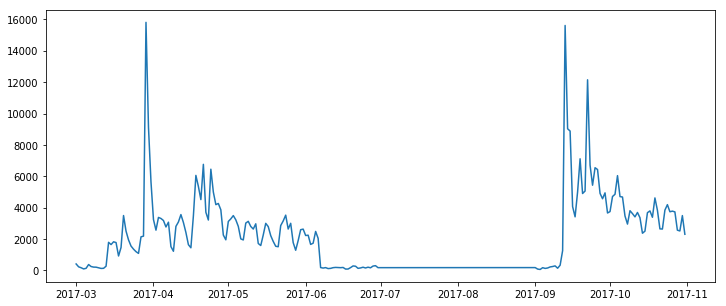

In [44]:
plt.rcParams["figure.figsize"] = (12,5)
plt.plot(df.groupby(['date_day'])['Post ID'].count())

The peak number of post for both product were close. However, iPhone 8 and X had an additional posting peak within 10 days. Also, the following discussion about iPhone on social media looks more intenvise than Samsung Galaxy S8.

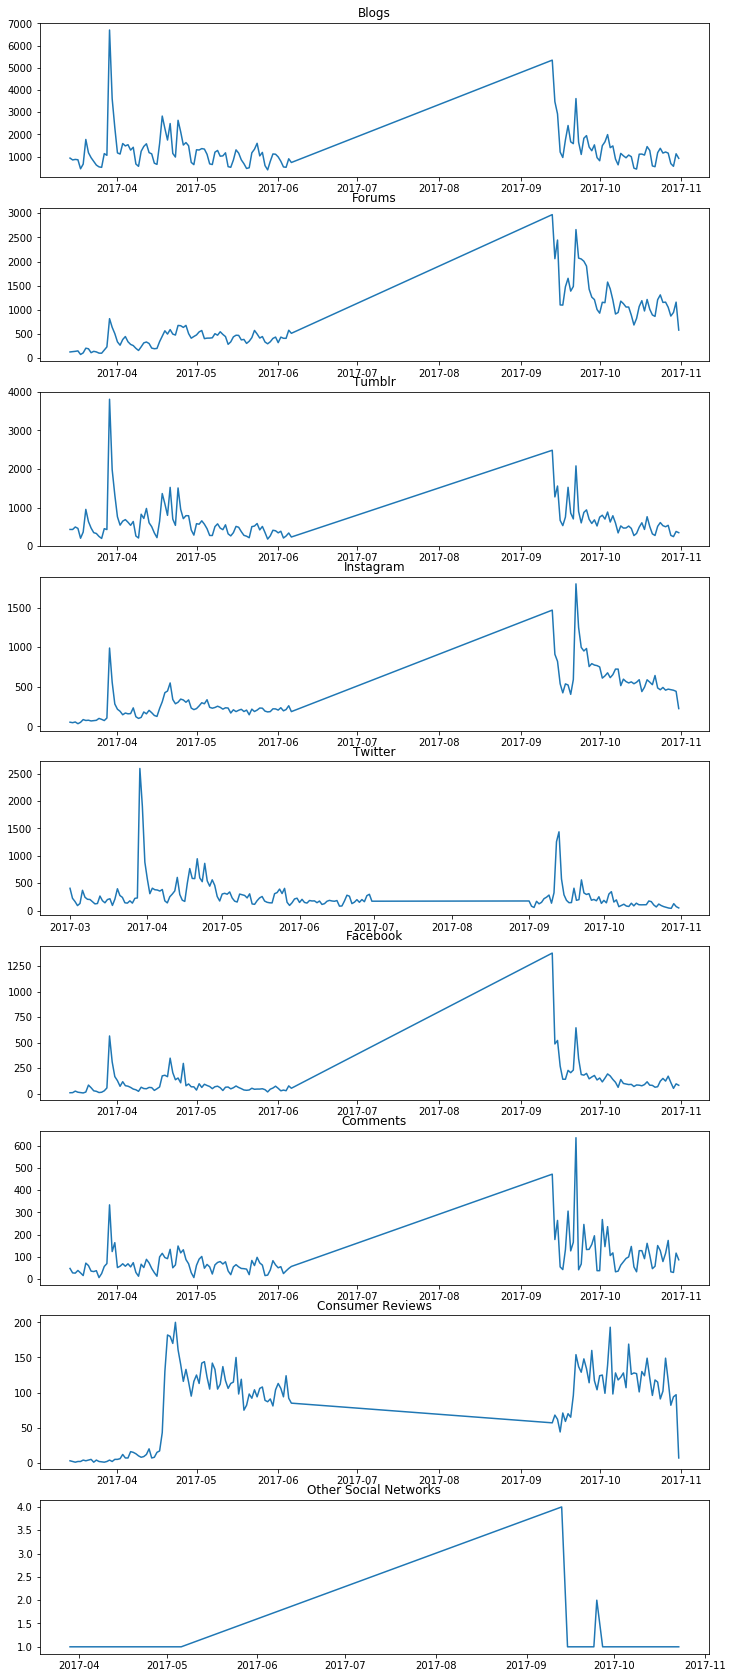

In [111]:
# seperate by source
plt.rcParams["figure.figsize"] = (12,30)
sources = df['Source Type'].value_counts()
for i in range(1,10):
    plt.subplot(9,1,i)
    source_data = df.loc[df['Source Type'] == str(sources.index[i-1])]
    plt.title(str(sources.index[i-1]))
    plt.plot(source_data.groupby(['date_day'])['Post ID'].count())

User posts and comments on different sources are not totally simultaneously. When Samsung Galaxy S8 released, twitter and consumer reviews response later than other social media. However, when iPhone 8 and iPhone X released, all the other sources excepts consumer reviews response in relatively same time.

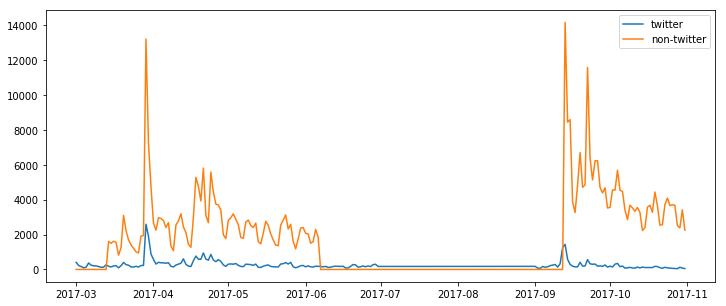

In [109]:
# twitter vs. non-twitter
plt.rcParams["figure.figsize"] = (12,5)
twitter = df.loc[df['Source Type'] == 'Twitter']
non_twitter = df.loc[df['Source Type'] != 'Twitter']
labels = ['twitter', 'non-twitter']

plt.plot(twitter.groupby(['date_day'])['Post ID'].count())
plt.plot(non_twitter.groupby(['date_day'])['Post ID'].count())
plt.legend(labels)

When samsung Galaxy S8 released, twitter and non-twitter responses similar. However, users on twitter response were not so overwhelming comparing to other sources.

## Top users

In [147]:
followers = df.groupby('Post ID').agg({'No. of Followers/Daily Unique Visitors': 'max'})
followers = followers.loc[followers['No. of Followers/Daily Unique Visitors'] > 10]
count = followers['No. of Followers/Daily Unique Visitors'].value_counts().tolist()
follower_number = followers['No. of Followers/Daily Unique Visitors'].value_counts().index.tolist()

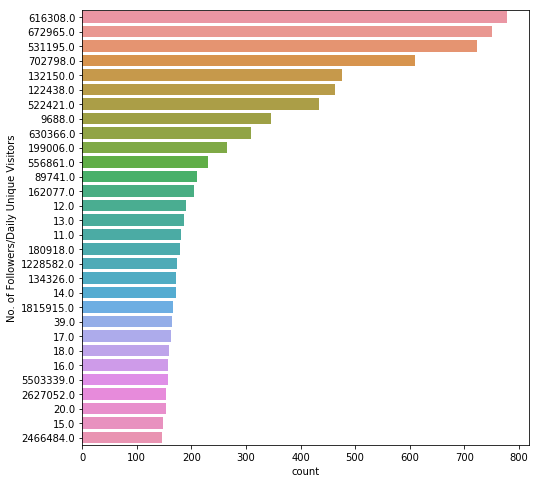

In [148]:
plt.figure(figsize = (8,8))
sns.countplot(y = followers["No. of Followers/Daily Unique Visitors"], \
              order = followers["No. of Followers/Daily Unique Visitors"].value_counts().index[:30])
plt.show()

In [150]:
# top 10 user
followers.reset_index().sort_values(by = 'No. of Followers/Daily Unique Visitors', ascending = False).head(10)

,Post ID,No. of Followers/Daily Unique Visitors
9193,176358752382299_1821787884506036_1833824436635714,150000000.0
192,104753296264554_1478921125514424,127774880.0
191,104753296264554_1477511468988723,127774880.0
330,107593572595009_1514091941945158_1515345551819797,116854496.0
297,107593572595009_1453195688034784_1466950189992667,116854496.0
1231,133803174373_10155328716544374_10155335443599374,116854496.0
335,107593572595009_1660400803980937,116854496.0
1230,133803174373_10155328236859374_10155335472539374,116854496.0
1301,137362696323133_1442515439141179_1443192399073483,116854496.0
1229,133803174373_10155328220104374_10155335442624374,116854496.0


## Correlation

In [157]:
# drop nan columns
drop_nan = drop_nan_column(0.95, df)

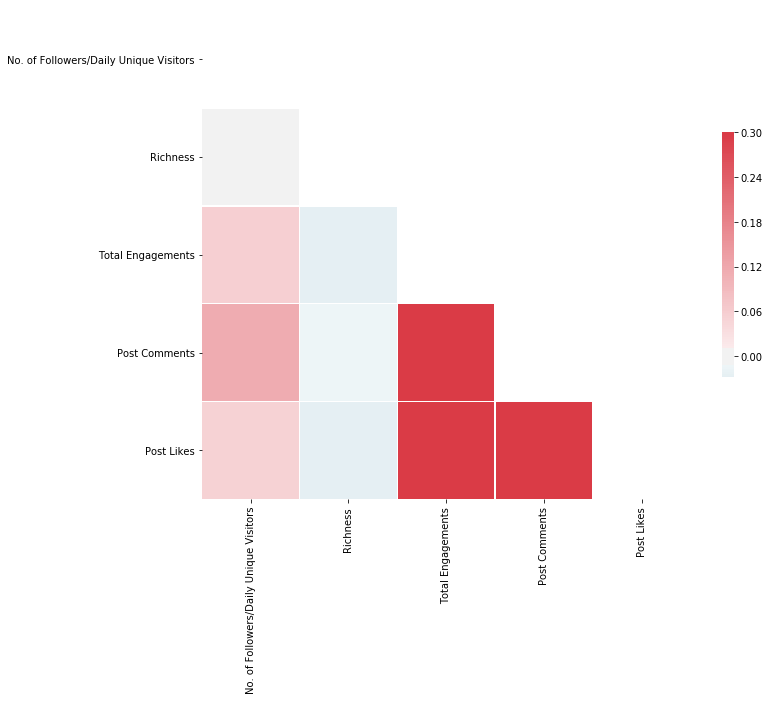

In [158]:
correlation_matrix = drop_nan.corr()
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})